<img src="logo_ups.jpg" width="400">
<div style="text-align: right"> Por: Jorge Ortiz, jorgeortizc05@gmail.com. Frank Montalvo, fmontalvoo@est.ups.edu.ec</div>

# Simulation Hairdressing Salon

## Sector Photographs
![titulo](pp0.jpg)![titulo](pp1.jpg)![titulo](pp2.jpg)

## Data collection
* Hairdresser name: Peluqueria Estilo Profesional EB
* Time of arrival per client to the hairdresser: 15 -45 minutos.
* Time of attention to children: 10 - 20 minutos.
* Time of attention to adults: 20 - 40 minutos.
* Time of attention to women: 30 - 50 minutos.
* Number of waiting chairs: 5
* Number of hairdressers: 1
![titulo](p3.png)
Formula used: 
tiempo_corte = TIEMPO_CORTE_MIN + (TIEMPO_CORTE_MAX – TIEMPO_CORTE_MIN) R



In [3]:
import pandas as pd

data = pd.read_csv('datos.csv')

data.head(6)

,tipoCliente,tiempoLlegada,tiempoAtencion,salida,tiempoEspera
0,nino,11.0,14.5,25.5,0.0
1,aulto,33.0,39.4,72.4,14.5
2,adulto,17.5,20.9,28.4,39.4
3,mujer,33.9,48.3,82.2,20.9
4,nino,17.6,15.0,32.6,48.3
5,mujer,29.1,35.1,64.2,15.0


### Objective.
* The objective of the simulation is estimate the average length of the queue, average wait time, average use of the hairdresser in a general person.
* Sort by children, adults and women and charge according to the time.

------------------- Bienvenido ------------------
Cliente 1 llego a la peluqueria en el minuto:  12.97565626817158
Cliente 1 es atendido por el peluquero en el minuto  12.97565626817158  y espero para ser atendido en el minuto 0.0 0.0
Corte listo al cliente  Cliente 1 y el corte se demoro  11.201476342045083
Cliente 1  deja la peluqueria en el minuto  24.177132610216663
24.177132610216663
{}
Cliente 2 llego a la peluqueria en el minuto:  39.02928707433651
Cliente 2 es atendido por el peluquero en el minuto  39.02928707433651  y espero para ser atendido en el minuto 0.0 0.0
Cliente 3 llego a la peluqueria en el minuto:  47.958592786534666
Corte listo al cliente  Cliente 2 y el corte se demoro  18.400347821989243
Cliente 2  deja la peluqueria en el minuto  57.42963489632575
57.42963489632575
{24.177132610216663: 1}
Cliente 3 es atendido por el peluquero en el minuto  57.42963489632575  y espero para ser atendido en el minuto 9.471042109791085 0.15785070182985142
Cliente 4 llego a la pelu

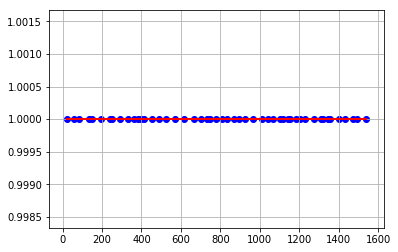

In [4]:
import random
import math
import simpy
import matplotlib.pyplot as pp

%matplotlib inline

SEMILLA = 30 #Puede ser cualquiera
NUM_PELUQUEROS = 1
TIEMPO_CORTE_MIN = 10#El tiempo de corte tarde entre 15-30 minutos
TIEMPO_CORTE_MAX = 50
T_LLEGADAS = 21 # 
TIEMPO_SIMULACION = 120 # 120 minutos, sin usar
TOT_CLIENTES = 50

tiempoEspera = 0.0 #Tiempo de espera total.
dt = 0.0 #duracion de servicio total
fin = 0.0 # minuto en el que finaliza.

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

def cortar(cliente):
    global dt # Acceso a la variable creada anteriormente.
    R = random.random() #Genera numeros aleatorios
    tiempo = TIEMPO_CORTE_MAX - TIEMPO_CORTE_MIN
    tiempo_corte = TIEMPO_CORTE_MIN + (tiempo*R) #Distribucion metodologia uniforme
    yield env.timeout(tiempo_corte) # deja de correr el tiempo n minutos
    print("Corte listo al cliente ",cliente, "y el corte se demoro ", tiempo_corte)
    dt = dt + tiempo_corte #acumula para obtener el total del servicio que dura la simulacion
    
def cliente(env, name, personal):
    global tiempoEspera
    global fin
    llega = env.now #Minuto que llega el cliente
    print(name, "llego a la peluqueria en el minuto: ", llega)
    with personal.request() as request:
        yield request #Obtiene turno
        pasa = env.now #Guadar el minuto cuando comienza a ser atendido
        espera = pasa - llega #Calcula el tiempo que espero.
        esperaHora = espera/60 # lo transforma en horas
        tiempoEspera = tiempoEspera + espera #Acumula los tiempo de espera
        print(name, 'es atendido por el peluquero en el minuto ', pasa, ' y espero para ser atendido en el minuto', espera, esperaHora)
        yield env.process(cortar(name)) #Empieza a cortar
        deja = env.now #Minuto en el que termina el corte de pelo
        print(name, " deja la peluqueria en el minuto ", deja)
        fin = deja #Conserva el ultimo minuto de la simulacion
        k=env.now
    
    print("==============================================")
    print(k)
    print(tiempo)
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
        
def principal(env, personal):
    llegada = 0
    i = 0
    for i in range(TOT_CLIENTES):
        R = random.random()
        llegada = -T_LLEGADAS * math.log(R) #Distribucion metodologia exponencial.
        yield env.timeout(llegada) #Deja transcurrir un tiempo entre uno y otro
        i += 1
        env.process(cliente(env, 'Cliente %d' %i, personal))
        
print ("------------------- Bienvenido ------------------")
random.seed (SEMILLA)  # Cualquier valor
env = simpy.Environment() # Crea el objeto entorno de simulacion
personal = simpy.Resource(env, NUM_PELUQUEROS) #Crea los recursos (peluqueros)
env.process(principal(env, personal)) #Invoca el proceso principal
env.run() #Inicia la simulacion

print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print ("\nDatos ")

lpc = tiempoEspera / fin
print ("\nPromedio Longitud de cola: %.2f" % lpc)
tep = tiempoEspera / TOT_CLIENTES
print ("Tiempo de espera promedio = %.2f" % tep)
upi = (dt / fin) / NUM_PELUQUEROS
print ("Uso promedio de la instalacion = %.2f" % upi)
print ("\n---------------------------------------------------------------------")

# Generamos la grafica
print(tiempo)
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

inicio
Ingresa en sala de espera, 0 ninios  tiempo: 12
Tiempo de atencion: 23
Cobra> 2
Ingresa en sala de espera, 1 ninios  tiempo: 28
Tiempo de atencion: 19
Cobra> 2
Ingresa en sala de espera, 2 ninios  tiempo: 48
Tiempo de atencion: 15
Cobra> 1.5
Ingresa en sala de espera, 3 ninios  tiempo: 65
Tiempo de atencion: 17
Cobra> 1.5
Ingresa en sala de espera, 4 ninios  tiempo: 83
Tiempo de atencion: 21
Cobra> 2
Ingresa en sala de espera, 0 ninias  tiempo: 93
Tiempo de atencion: 23
Cobra> 2.5
Ingresa en sala de espera, 1 ninias  tiempo: 112
Tiempo de atencion: 35
Cobra> 2.5
Ingresa en sala de espera, 2 ninias  tiempo: 124
Tiempo de atencion: 32
Cobra> 2.5
Ingresa en sala de espera, 3 ninias  tiempo: 137
Tiempo de atencion: 23
Cobra> 2.5
Ingresa en sala de espera, 4 ninias  tiempo: 147
Tiempo de atencion: 24
Cobra> 2.5
Ingresa en sala de espera, 5 ninias  tiempo: 163
Tiempo de atencion: 27
Cobra> 2.5
Ingresa en sala de espera, 6 ninias  tiempo: 178
Tiempo de atencion: 21
Cobra> 1.5
Ingresa e

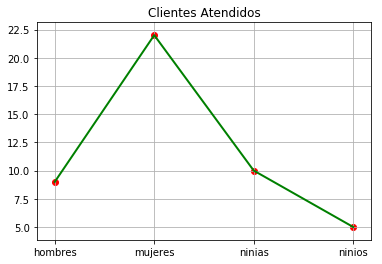

Ingresa en sala de espera, 11 hombres  tiempo: 703
Tiempo de atencion: 24
Cobra> 2.5


In [1]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

sumaTotal = 0;

class Cliente:
	
	def __init__(self):
		self.clientes = { 'ninios' : [(10, 25) , (1.5, 2)], 'ninias' : [(10, 35), (1.5, 2.5)], 'mujeres' : [(20, 50), (2.5, 7)], 'hombres': [(20, 30), (2.5, 3)],}
	
	def generaClientes(self, totalClientes):
		self.ninios = totalClientes * .10
		self.ninias = totalClientes * .20
		self.hombre = totalClientes * .25
		self.mujer = totalClientes * .45
		self.clientes['ninios'].append(self.ninios)
		self.clientes['ninias'].append(self.ninias)
		self.clientes['hombres'].append(self.hombre)
		self.clientes['mujeres'].append(self.mujer)
		
		return self.clientes

class Peluqueria:
	
	def __init__(self, environment, sala_espera, peluqueros):
		self.env = environment
		self.sala_espera = simpy.Resource(self.env, sala_espera)
		self.peluqueros = simpy.Resource(self.env, peluqueros)
		self.totalNinios = 0
		self.totalNinias = 0
		self.totalHombres = 0
		self.totalMujeres = 0
		self.tiempoLlega = 0
		self.tiempoSale = 0
		print('inicio')

	def ingresaSala(self, cliente):
		with self.sala_espera.request() as sala:
			yield sala
			llega = self.env.now
			self.tiempoLlega = llega
			print('Ingresa en sala de espera,', cliente['numero'], cliente['cliente'],' tiempo:', llega)
			yield self.env.process(self.asignarCliente(cliente))

	def asignarCliente(self, cliente):
		i, f = cliente['tiempo_atencion']
		tiempo = random.randint(i, f)
		print('Tiempo de atencion:', tiempo)
		if(tiempo >= (i + f) / 2):
			print('Cobra>', cliente['paga'][1])
		else:
			print('Cobra>', cliente['paga'][0])
		yield self.env.timeout(tiempo)
		with self.peluqueros.request() as corte_peluquero:
			yield corte_peluquero
			yield self.env.process(self.atiendeCliente(cliente))
			
	
	def atiendeCliente(self, cliente):
		sale = self.env.now
		self.tiempoSale = sale
		yield self.env.timeout(random.randint(15, 25))
		if(cliente['cliente'] == 'ninios'):
			self.totalNinios += 1
		if(cliente['cliente'] == 'ninias'):
			self.totalNinias += 1
		if(cliente['cliente'] == 'hombres'):
			self.totalHombres += 1
		if(cliente['cliente'] == 'mujeres'):
			self.totalMujeres += 1
			
	def resultados(self):
		return [('ninios', self.totalNinios), ('ninias', self.totalNinias), ('hombres', self.totalHombres), ('mujeres', self.totalMujeres)]


SALA_ESPERA = 6
PELUQUEROS = 2
TOTAL_CLIENTES = 50

def main(env):
	cliente = Cliente()
	clientes = cliente.generaClientes(TOTAL_CLIENTES)
	peluqueria = Peluqueria(env, SALA_ESPERA, PELUQUEROS)
	intervalo = 15
	for cliente in clientes:
		total = clientes[cliente]
		for i in range(int(total[2])):
			yield env.timeout(random.randint(intervalo - 5, intervalo + 5))
			c = {'cliente' : cliente, 'numero' : i, 'paga' : total[1], 'tiempo_atencion' : total[0]}
			env.process(peluqueria.ingresaSala(c))

	datos = sorted(peluqueria.resultados())
	x, y = zip(*datos)
	print(x,y)
	pp.plot(x, y, linewidth = 2, color = 'green')
	pp.scatter(x, y, color='red')
	pp.grid(True)
	pp.title("Clientes Atendidos")
	pp.show()
		 
if __name__ == '__main__':
	random.seed(21)
	env = simpy.Environment()
	env.process(main(env)) 
	env.run(until = 30000000)

